In [1]:
from fastai import* 
from fastai.vision import*

In [2]:
from exp.nb_new_data_augmentation import *

In [3]:
path =Path('.')

In [4]:
tfms = get_transforms()

In [5]:
bs = 64
size = 128

In [6]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train.csv', folder='train', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df())

In [8]:
data = (src.transform(tfms, size=size,).databunch(bs=bs).normalize(imagenet_stats))

In [12]:
learn = Learner(data, models.resnet34(), metrics=accuracy)

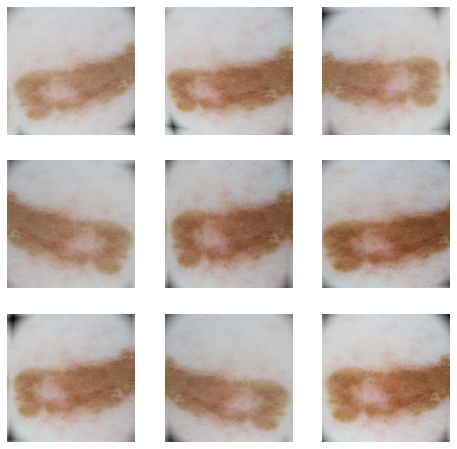

In [13]:
learn.show_single_img_tfms();

In [14]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time


BrokenPipeError: [Errno 32] Broken pipe

# Cutout (DeVries, 2017)
This is a single-image transformation, but it's very close to some of the newer multi-image ones, since it randomly selects an area that is removed.

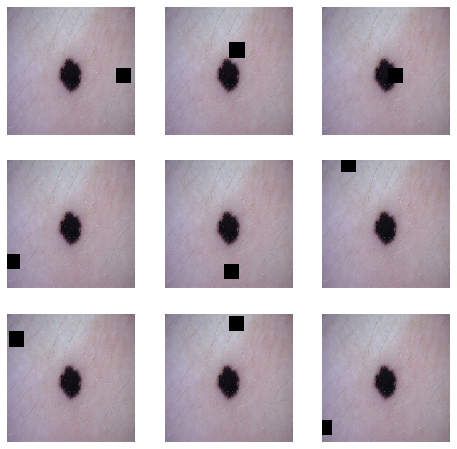

In [22]:
data = (src.transform(size=size,).databunch(bs=bs).normalize(imagenet_stats))
learn = Learner(data, models.resnet34(), metrics=accuracy)
learn.data.train_ds.tfms = [cutout()]
learn.show_single_img_tfms();

In [23]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.192879,1.893498,0.429333,06:07
1,1.229110,1.239227,0.555468,03:00
2,1.177815,1.270300,0.534741,02:32
3,1.103135,1.267527,0.600276,02:24
4,1.073287,1.068009,0.610343,02:22
5,1.009364,1.002298,0.643703,02:21
6,0.969108,0.961501,0.654560,02:25
7,0.891986,0.921457,0.673510,02:28
8,0.839344,0.915462,0.672917,02:29
9,0.800902,0.914574,0.676076,02:27


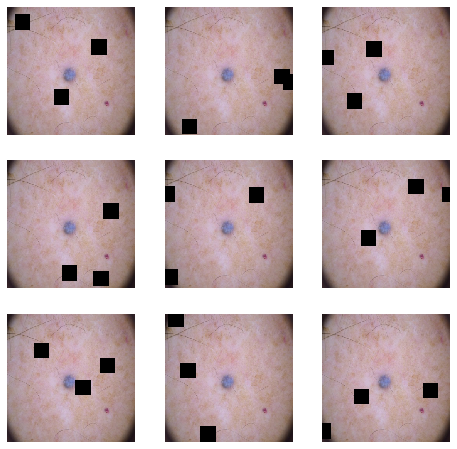

In [25]:
data = (src.transform(size=size,).databunch(bs=bs).normalize(imagenet_stats))
learn = Learner(data, models.resnet34(), metrics=accuracy)
learn.data.train_ds.tfms = [cutout(n_holes=(3,3))]
learn.show_single_img_tfms();

In [26]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.241352,1.226736,0.557244,02:29
1,1.240898,1.262875,0.565535,02:36
2,1.169410,1.171417,0.604619,02:30
3,1.129444,1.187104,0.593368,02:33
4,1.084049,1.032377,0.634031,02:39
5,1.036955,1.023517,0.635610,02:44
6,0.998455,0.961785,0.659889,02:33
7,0.930361,0.936074,0.664824,02:33
8,0.902900,0.912673,0.668772,02:29
9,0.864683,0.912583,0.671930,02:37


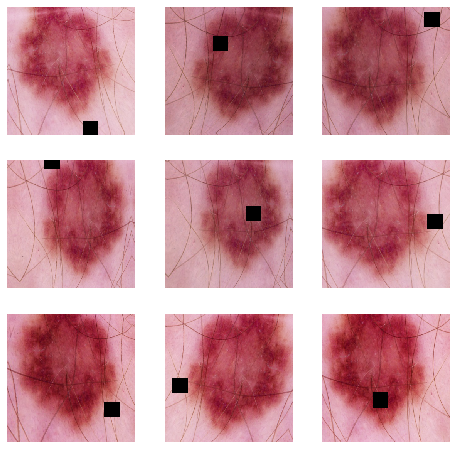

In [11]:
tfms = get_transforms(xtra_tfms=[cutout()])
data = (src.transform(tfms, size=size,).databunch(bs=bs).normalize(imagenet_stats))
learn = Learner(data, models.resnet34(), metrics=accuracy) #resetting the model
learn.show_single_img_tfms();

In [12]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.251639,1.407112,0.550336,02:18
1,1.230376,1.152126,0.587643,02:35
2,1.194109,1.289420,0.580537,02:21
3,1.138688,1.285960,0.526648,02:11
4,1.122048,1.090274,0.616068,02:11
5,1.059865,1.022628,0.634228,02:13
6,1.026886,1.015592,0.641532,02:17
7,0.978015,0.959300,0.651796,02:17
8,0.950450,0.938725,0.663245,02:11
9,0.953579,0.930607,0.666601,02:14


# cutout with more sprinkles

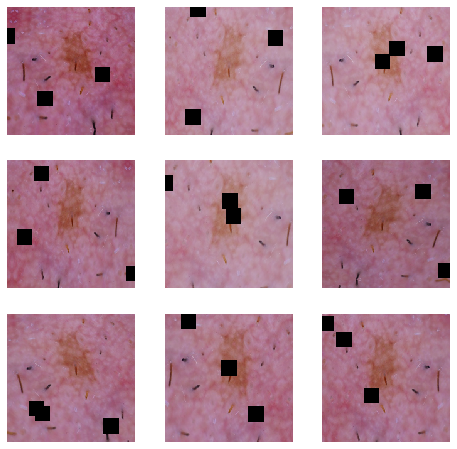

In [13]:
tfms = get_transforms(xtra_tfms=[cutout(n_holes=(3,3))])
data = (src.transform(tfms, size=size,).databunch(bs=bs).normalize(imagenet_stats))
learn = Learner(data, models.resnet34(), metrics=accuracy) #resetting the model
learn.show_single_img_tfms();

In [14]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.267044,1.229105,0.563758,02:19
1,1.266753,1.429528,0.546980,02:17
2,1.212209,1.294111,0.575799,02:19
3,1.170329,1.177446,0.591788,02:18
4,1.115671,1.100775,0.601461,02:17
5,1.088282,1.083058,0.621003,02:17
6,1.052774,1.011892,0.636005,02:18
7,1.018693,0.971044,0.648441,02:19
8,0.976554,0.945405,0.660482,02:17
9,0.970479,0.936965,0.663837,02:15


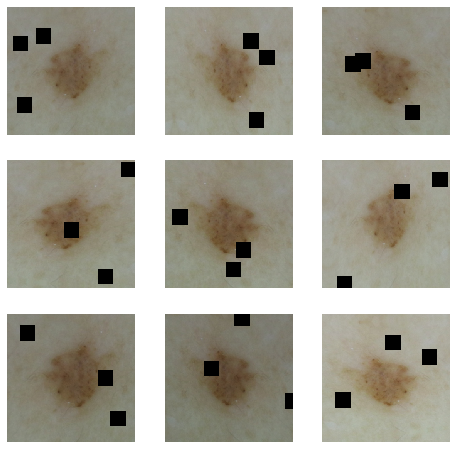

epoch,train_loss,valid_loss,accuracy,time
0,1.284829,1.420657,0.541848,02:35
1,1.252525,1.179102,0.567706,02:24
2,1.183307,1.212807,0.570075,02:23
3,1.137376,1.131299,0.608764,02:23
4,1.141989,1.177854,0.606593,02:22
5,1.107890,1.077379,0.612317,02:23
6,1.089653,1.075482,0.623766,02:22
7,1.082048,1.029973,0.628306,02:22
8,1.034073,1.035398,0.622582,02:37
9,1.051883,1.066245,0.630280,02:38


In [27]:
tfms = get_transforms(xtra_tfms=[cutout(n_holes=(3,3))])
data = (src.transform(tfms, size=size,).databunch(bs=bs).normalize(imagenet_stats))
learn = Learner(data, models.resnet34(), metrics=accuracy) #resetting the model
learn.show_single_img_tfms();
learn.fit(10)

# Mixup (Zhang, 2018)
https://arxiv.org/abs/1710.09412

Mixup blends two images drawn at random from our training data. A weight λ (between .5-1) is assigned to the first sample, and 1-λ to the second one. Despite its simplicity, mixup allows a new state-of-the-art performance in the CIFAR-10, CIFAR- 100, and ImageNet-2012 image classification datasets.

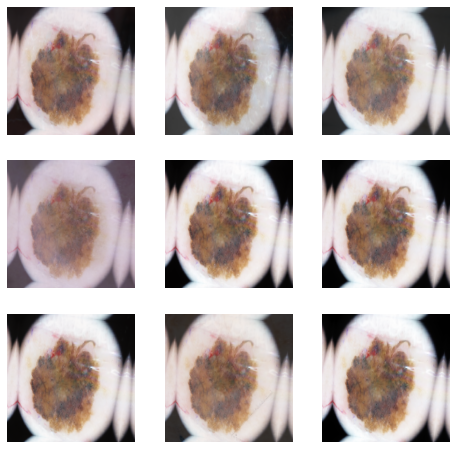

In [15]:
tfms = get_transforms()
data = (src.transform(tfms, size=size,).databunch(bs=bs).normalize(imagenet_stats))
learn = Learner(data, models.resnet34(), metrics=accuracy).mixup() #resetting the model
learn.show_multi_img_tfms();

In [16]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.297249,1.226080,0.542440,02:16
1,1.302203,1.416810,0.539676,02:17
2,1.295047,1.271789,0.536321,02:18
3,1.246837,1.122488,0.591591,02:16
4,1.222194,1.097122,0.609751,02:18
5,1.183296,1.035432,0.633044,02:21
6,1.178373,1.024843,0.641137,02:20
7,1.131972,0.977942,0.649428,02:18
8,1.097222,0.959802,0.656139,02:18
9,1.100325,0.954705,0.657718,02:19


# Ricap (Takahashi, 2018)
RICAP (Random Image Cropping and Patching) crops four training images and patches them to construct a new training image; it selects images and determines the cropping sizes randomly, where the size of the final image is identical to that of the original image.

RICAP achieves a new state-of-the-art test error of 2.19% on CIFAR-10. We also confirmed that deep CNNs with RICAP achieve better results on classification tasks using CIFAR-100 and ImageNet and an image-caption retrieval task using Microsoft COCO.

It's applied in the following way:

a pixel coordinate in the image is randomly selected. That creates 4 areas within an image.
4 regions from different images are cropped and patched to create a new image.

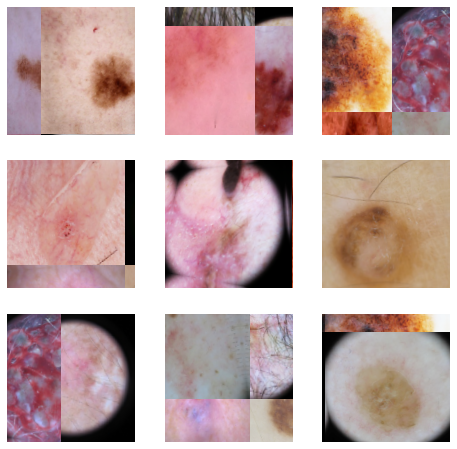

In [17]:
learn = Learner(data, models.resnet34(), metrics=accuracy).ricap() #resetting the model
learn.show_multi_img_tfms();

In [18]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.327637,1.318065,0.545203,02:18
1,0.338608,1.246074,0.542835,02:20
2,0.335515,1.255720,0.544019,02:29
3,0.322750,1.229725,0.566325,02:26
4,0.323407,1.239092,0.556455,02:25
5,0.312818,1.069083,0.616068,02:29
6,0.307217,1.061469,0.613107,02:26
7,0.294045,1.009688,0.639360,02:28
8,0.288973,0.985624,0.648835,02:28
9,0.295238,0.987299,0.643111,02:27


# Cutmix (Yun, 2019)
https://arxiv.org/abs/1905.04899

Cutmix is similar to Cutout, as a single patch is cut and pasted into a different training image.

CutMix consistently outperforms the state-of-the-art augmentation strategies on CIFAR and ImageNet classification tasks, as well as on the ImageNet weakly- supervised localization task.

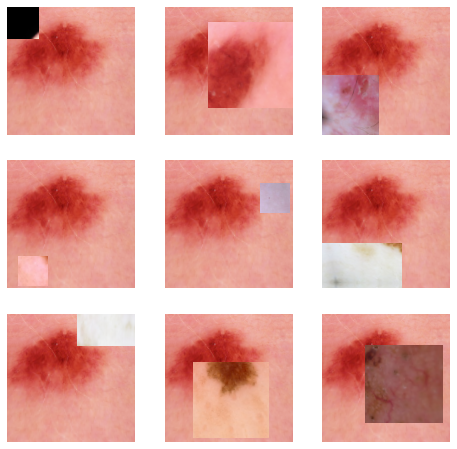

In [19]:
learn = Learner(data, models.resnet34(), metrics=accuracy).cutmix() #resetting the model
learn.show_multi_img_tfms();

In [20]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.333262,1.341062,0.500790,02:26
1,1.358357,1.327341,0.501382,02:25
2,1.302525,1.326924,0.521121,02:27
3,1.286607,1.129845,0.602645,02:28
4,1.230097,1.104735,0.602448,02:27
5,1.227315,1.076496,0.621003,02:27
6,1.203594,1.038984,0.635413,02:25
7,1.190268,1.021577,0.635215,02:26
8,1.164784,0.982429,0.653968,02:25
9,1.148986,0.975839,0.653968,02:26
